<a href="https://colab.research.google.com/github/kizhakk/Bootstrap3/blob/master/JIRRA_FinalProject_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Feature Importance
#Dataframe and numerical library
import pandas as pd 
import numpy as np

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
#Machine Learming Model
from sklearn.linear_model import LogisticRegression 

#Bank Customers Churn DataSet from   https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers/download?datasetVersionNumber=1
df = pd.read_csv("churn.csv")
df.sample(5)



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5016,5017,15687903,Okonkwo,501,France,Female,29,8,0.00,2,1,0,112664.24,0
4678,4679,15589147,Frolov,580,Spain,Male,61,8,125921.37,1,1,1,94677.83,0
5740,5741,15568885,Scott,620,Germany,Female,34,8,102251.57,1,1,0,120672.09,0
7496,7497,15608804,Allan,824,Germany,Male,49,8,133231.48,1,1,1,67885.37,0
4168,4169,15690796,Chambers,516,France,Male,37,8,0.00,1,1,0,101834.58,0


In [10]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Write out the versions of all packages to requirements.txt - THIS IS IMPORTANT!
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print - everything will output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
df.shape



(10000, 14)

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [13]:
df = df[cols]

In [13]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [22]:
cols = ['creditscore',
'geography',
'gender',
'age',
'tenure',
'balance',
'numofproducts',
'hascrcard',
'isactivemember',
'estimatedsalary',
'exited']

In [18]:
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [14]:
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,hargrave,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,hill,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,onio,502,france,female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,boni,699,france,female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,mitchell,850,spain,female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
churn_num = df.select_dtypes('number').columns
churn_cat = df.select_dtypes('object').columns

<Axes: >

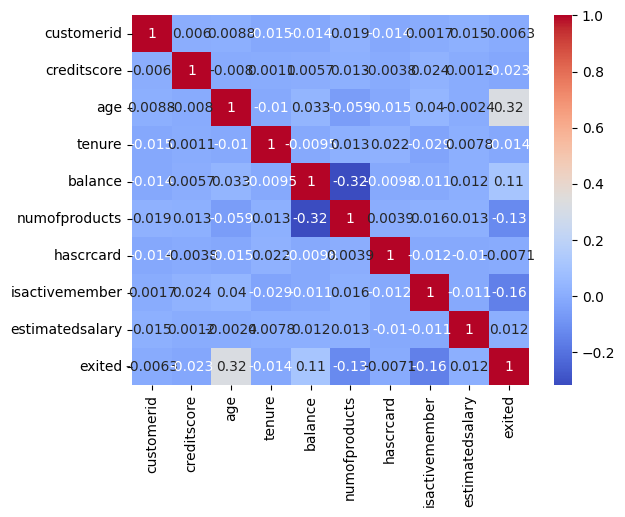

In [16]:
sns.heatmap(df.iloc[:,1:].corr(method='spearman'), cmap='coolwarm', annot=True)


======================creditscore===================


<Axes: xlabel='exited', ylabel='creditscore'>

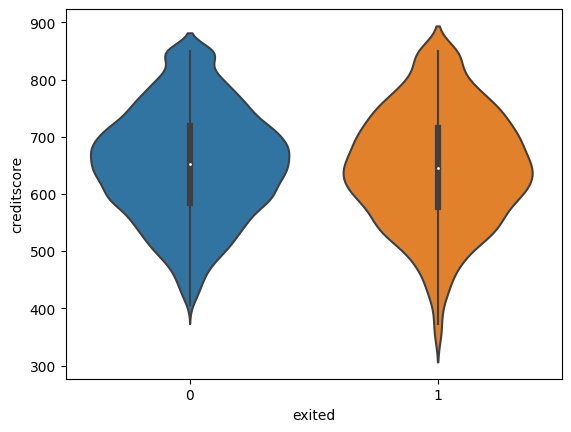


======================geography===================


<Axes: xlabel='exited', ylabel='geography'>

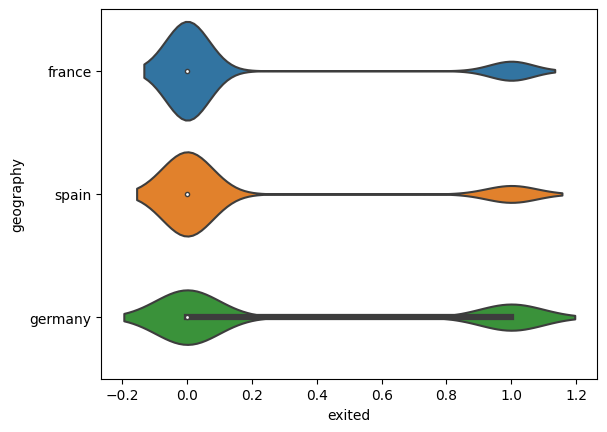


======================gender===================


<Axes: xlabel='exited', ylabel='gender'>

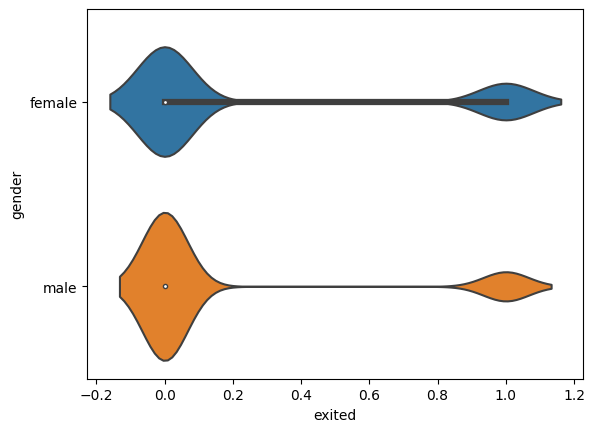


======================age===================


<Axes: xlabel='exited', ylabel='age'>

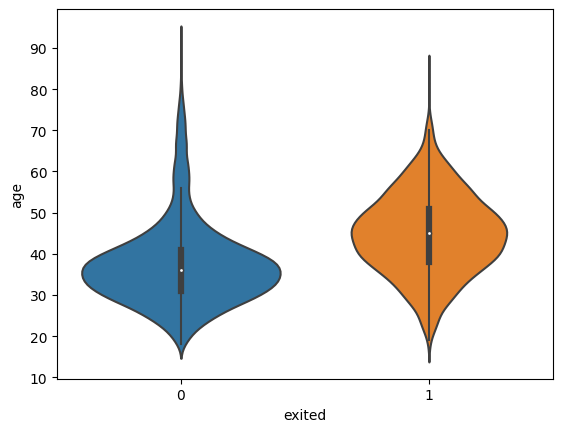


======================tenure===================


<Axes: xlabel='exited', ylabel='tenure'>

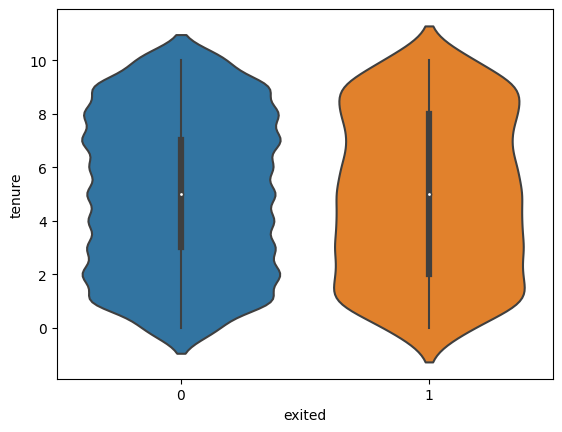


======================balance===================


<Axes: xlabel='exited', ylabel='balance'>

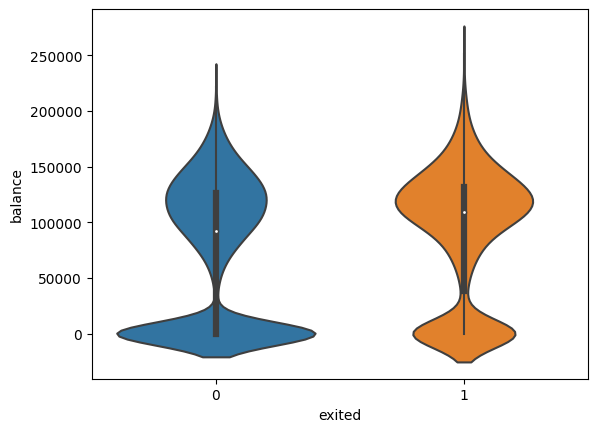


======================numofproducts===================


<Axes: xlabel='exited', ylabel='numofproducts'>

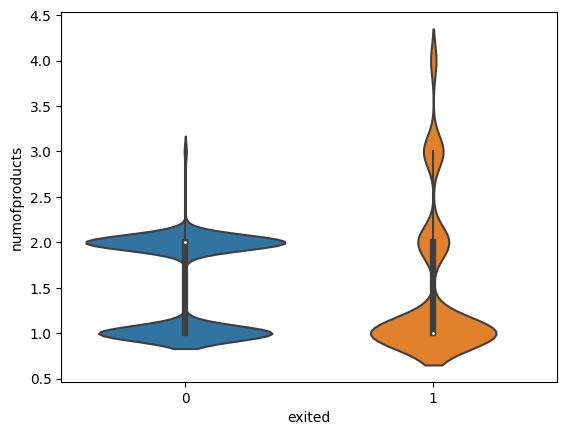


======================hascrcard===================


<Axes: xlabel='exited', ylabel='hascrcard'>

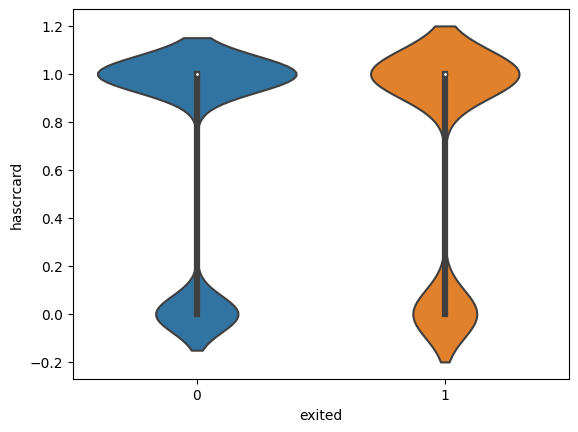


======================isactivemember===================


<Axes: xlabel='exited', ylabel='isactivemember'>

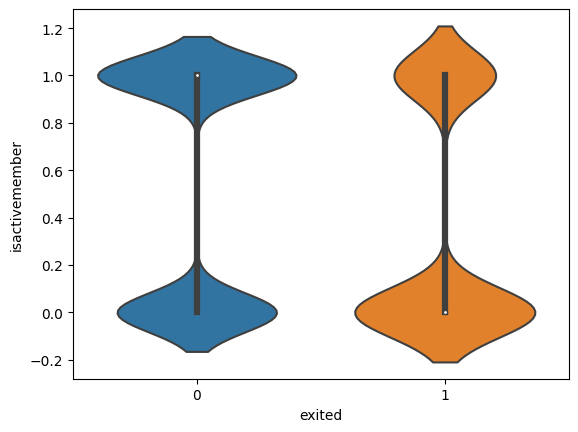


======================estimatedsalary===================


<Axes: xlabel='exited', ylabel='estimatedsalary'>

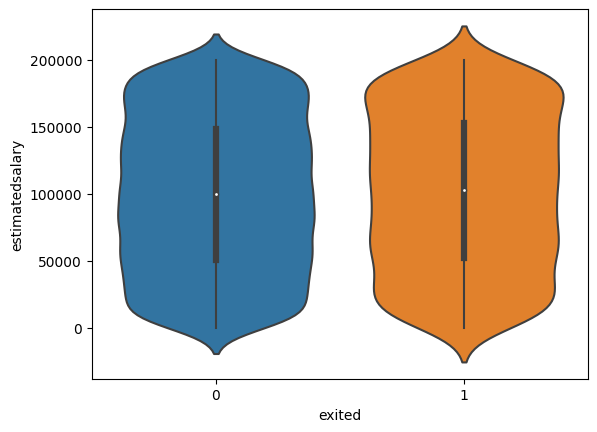


======================exited===================


<Axes: xlabel='exited', ylabel='exited'>

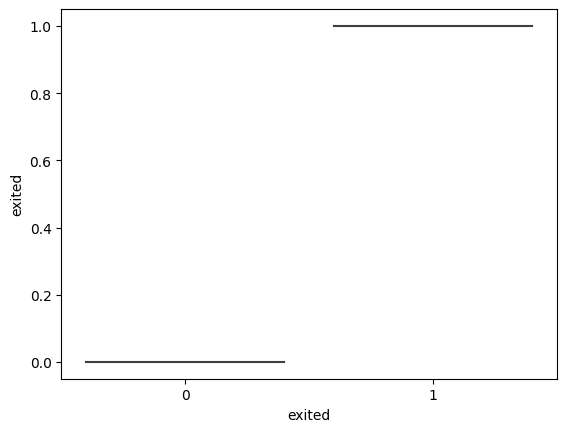

In [23]:
# looks like there are some outliers in our data, but we can get a aseline first and address those next
for col in cols:
  print('\n======================{}==================='.format(col))
  sns.violinplot(x='exited', y=col, jitter=True, data=df);
  plt.show()

In [24]:
df_drop = df.drop(columns = ['exited'])

In [25]:
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split. 
# Random state will recreate the split on your machine, but your machine only. Uses your specific machine details to split data. 
df_train_full, df_test = train_test_split(df_drop, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.2, random_state=42)
len(df_train_full), len(df_train),len(df_val), len(df_test)

(8000, 6400, 1600, 2000)

In [26]:
df_train_full.head()
df_train.head()
df_val.head()
df_test.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
9254,9255,15601116,p'an,686,france,male,32,6,0.00,2,1,1,179093.26
1561,1562,15766374,leak,632,germany,male,42,4,119624.60,2,1,1,195978.86
1670,1671,15716994,green,559,spain,male,24,3,114739.92,1,1,0,85891.02
6087,6088,15730759,chukwudi,561,france,female,27,9,135637.00,1,1,0,153080.40
6669,6670,15797900,chinomso,517,france,male,56,9,142147.32,1,0,0,39488.04


,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
2579,2580,15597896,ozoemena,365,germany,male,30,0,127760.07,1,1,0,81537.85
7128,7129,15690372,henry,553,spain,male,38,1,181110.13,2,1,0,184544.59
4082,4083,15669301,romani,778,germany,female,29,6,150358.97,1,1,0,62454.01
2550,2551,15784301,wang,850,france,male,42,0,0.00,2,1,0,44165.84
4926,4927,15762927,sung,674,germany,female,36,6,100762.64,1,1,0,182156.86


,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
3188,3189,15586757,anenechukwu,801,france,female,32,4,75170.54,1,1,1,37898.50
8293,8294,15770711,lu,766,germany,female,28,4,90696.78,1,0,1,21597.20
1710,1711,15567993,palmer,828,spain,male,28,8,134766.85,1,1,0,79355.87
7510,7511,15729377,ku,798,france,male,36,1,0.00,2,1,1,159044.10
1461,1462,15640627,wan,611,spain,male,34,4,0.00,2,1,0,170950.58


,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
6252,6253,15687492,anderson,596,germany,male,32,3,96709.07,2,0,0,41788.37
4684,4685,15736963,herring,623,france,male,43,1,0.00,2,1,1,146379.30
1731,1732,15721730,amechi,601,spain,female,44,4,0.00,2,1,0,58561.31
4742,4743,15762134,liang,506,germany,male,59,8,119152.10,2,1,1,170679.74
4521,4522,15648898,chuang,560,spain,female,27,7,124995.98,1,1,1,114669.79
